In [1]:
import scipy.ndimage as ndi
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import imageio
dirname = 'C:/Users/dooora/Desktop/jupyter'


# Read as loose images
im2 = imageio.imread("r_str_akira_20181104.nii")
# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)


Image type: <class 'imageio.core.util.Array'>
Shape of image array: (263, 271, 204)


Data type: uint8
Min. value: 0
Max value: 163


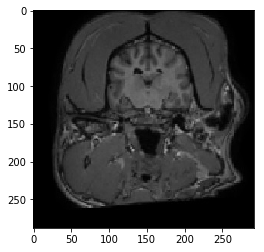

In [41]:
#these features only work for 2D data
im = imageio.imread("snapshot.jpg")
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plotting the grayscale image
plt.imshow(im,vmin=0, vmax=255)
#plt.colorbar()
#format_and_render_plot()

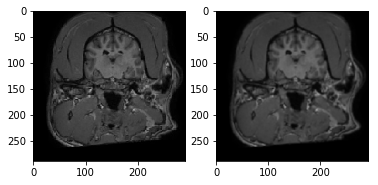

In [18]:
# Set filter weights
weights = [[0.11, 0.11],
           [0.11, 0.11]]

# Convolve the image with the filter
#im_filt = ndi.convolve(im, weights) so atm I cannot use kernels for filtering as I don't know what shape should they have 
#(or whar dimensions my images have to begin with)
im_filt =ndi.uniform_filter(im, size=3)
# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_filt)
#format_and_render_plot()

In [19]:
mask_high = im > 15
# Plot the images
#fig, axes = plt.subplots(1,2)
#axes[0].imshow(im)
#axes[1].imshow(mask_high)
#format_and_render_plot()

In [20]:
type(mask_high)


imageio.core.util.Array

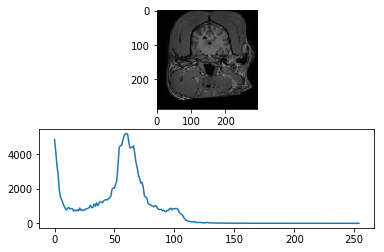

In [14]:
#this also works for 3D
hist = ndi.histogram(im2, min=1, max=255, bins=255)
# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im2)
axes[1].plot(hist)

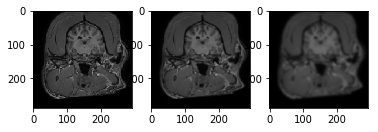

In [23]:
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

fig, axes = plt.subplots(1,3)
axes[0].imshow(im)
axes[1].imshow(im_s1)
axes[2].imshow(im_s3)


In [ ]:
imageio.imwrite('smooth_s3.png', im_s3)
imageio.imwrite('smooth_s1.png', im_s1)
#save the filtered image

In [5]:
#pip install visvis before first use
import imageio
import visvis as vv

vol = imageio.volread('r_str_akira_20181104.nii')
vv.volshow(vol)

In [24]:
# Import ImageIO
import imageio

# Load the volume
vol = imageio.volread('r_str_akira_20181104.nii')

# Print image attributes
print('Available metadata:',vol.meta.keys())
print('Shape of image array:', vol.shape)

Available metadata: odict_keys([])
Shape of image array: (263, 271, 204)


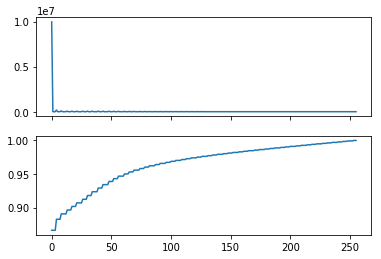

In [25]:
# Create a histogram, binned at each possible value
hist = ndi.histogram(im2, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum() 

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
#format_and_render_plot()

In [26]:
im3=vol[55, 55]

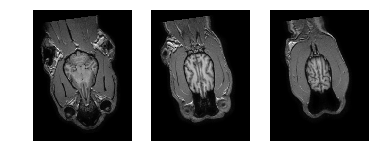

In [27]:
#navigiating among the slices
fig, axes = plt.subplots(nrows=1,
ncols=3)
axes[0].imshow(vol[120],cmap='gray')
axes[1].imshow(vol[140],cmap='gray')
axes[2].imshow(vol[150],cmap='gray')
for ax in axes:
    ax.axis('off')
plt.show()

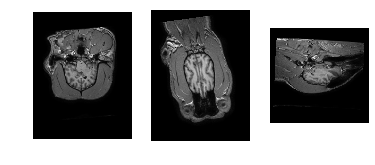

In [28]:
#navigating along the different axes
view_1v2 = vol[140, :, :]
view_0v2 = vol[:, 125, :]
view_0v1 = vol[:, :, 113]
fig, axes = plt.subplots(nrows=1,
ncols=3)
axes[0].imshow(view_0v2,cmap='gray')
axes[1].imshow(view_1v2,cmap='gray')
axes[2].imshow(view_0v1,cmap='gray')
for ax in axes:
    ax.axis('off')
plt.show()

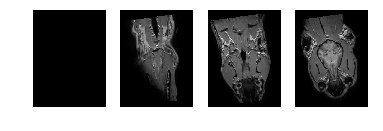

In [29]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = vol[ii*40, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis("off")
    
# Render the figure
plt.show()

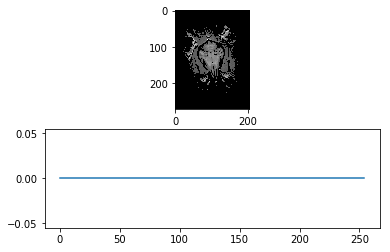

In [37]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Screen out pixels from "im"
mask_nonbrain = im>= 700
im_nonbrain = np.where(mask_nonbrain, im, 0)

# Get the histogram intensities
hist = ndi.histogram(im_nonbrain, min=1, max=255, bins=255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_nonbrain,cmap='gray')
axes[1].plot(hist)
#format_and_render_plot()

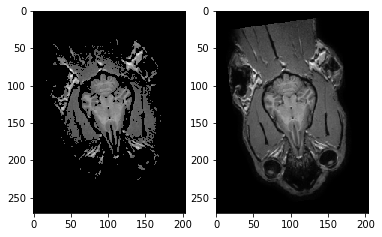

In [39]:
# Create masks

mask_brain = (im< 150) & (im>=30)
im_brain = np.where(mask_nonbrain, im, 0)
# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(im_brain, cmap='gray')
axes[1].imshow(im,cmap='gray')
#format_and_render_plot()

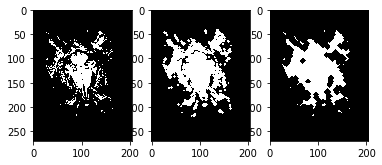

In [40]:
mask_brain2 = im>= 800
mask_dilate = ndi.binary_dilation(mask_brain2, iterations=2)
mask_closed =ndi.binary_closing(mask_brain2, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_brain2,cmap='gray')
axes[1].imshow(mask_dilate,cmap='gray')
axes[2].imshow(mask_closed,cmap='gray')
#format_and_render_plot()